# Проект: ABC/XYZ и RFM анализ продаж одежды через маркетплейсы

## Обзор проекта

**Тема:** Применение двух подходов управления товарной матрицей и клиентской базой на примере одежды, продаваемой через маркетплейсы

**Цель:** Выявить лучшую/худшую категорию товаров (ABC-анализ), сегментировать клиентскую базу (XYZ-анализ). Дать рекомендации клиенту по товарной матрице и клиентской базе.

**Данные:** 8,000 заказов от 450 уникальных покупателей за период январь 2024 - сентябрь 2025

**Этапы исследования**

- Этап 1: Подготовка данных (EDA)
- Этап 2: ABC-анализ товаров
- Этап 3: XYZ-анализ волатильности спроса
- Этап 4: Матрица ABC-XYZ (комбинированный анализ)
- Этап 5: RFM-анализ клиентов
- Этап 6: Общие выводы и рекомендации

---
### Этап 1: Подготовка данных (EDA)
- Описание данных
- Загрузка и первичный осмотр данных
- Проверка на пропущенные значения и аномалии
- Анализ распределения по категориям, маркетплейсам, временным периодам
- Визуализация трендов продаж по месяцам
- Анализ клиентской базы
- Анализ маркетплейсов
- Анализ возвратов по категориям

#### Описание данных

- **order_id** - уникальный идентификатор заказа
- **customer_id** - уникальный идентификатор покупателя
- **order_date** - дата заказа
- **category** - основная категория товара (Tops, Bottoms, Dresses, Outerwear, Accessories, Footwear, Activewear, Intimate)
- **sub_category** - подкатегория товара
- **price_per_unit** - цена единицы товара
- **quantity** - количество единиц в заказе
- **color** - цвет товара
- **size** - размер товара
- **discount** - процент скидки
- **order_amount** - итоговая сумма заказа (с учетом скидок)
- **returned** - статус возврата (0 - не возвращено, 1 - возвращено)
- **marketplace** - площадка продажи (Wildberries, Ozon, Yandex.Market, Lamoda, ASOS)

#### Загрузка данных и первичный осмотр данных

In [1]:
# загружаю библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# Настройки визуализации
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_palette("Set2")

In [3]:
# загружаю данные
df = pd.read_csv('clothing_marketplace_sales.csv')

print(f"Датасет загружен успешно")
print(f"Shape: {df.shape}")
print(f'\nТипы данных:')
print(df.dtypes)
print(f"\nПервые 5 строк:")
df.head()

Датасет загружен успешно
Shape: (8000, 13)

Типы данных:
order_id            int64
customer_id         int64
order_date         object
category           object
sub_category       object
price_per_unit    float64
quantity            int64
color              object
size               object
discount            int64
order_amount      float64
returned            int64
marketplace        object
dtype: object

Первые 5 строк:


,order_id,customer_id,order_date,category,sub_category,price_per_unit,quantity,color,size,discount,order_amount,returned,marketplace
0,15402,4024,2024-01-01,Outerwear,Cardigan,6363.92,2,Pink,XXL,5,12091.45,0,Ozon
1,13165,2128,2024-01-01,Bottoms,Skirt,1777.29,2,White,XS,10,3199.13,0,Yandex.Market
2,15078,2076,2024-01-01,Intimate,Pajamas,1123.06,2,Beige,S,0,2246.13,0,Yandex.Market
3,16836,4041,2024-01-01,Bottoms,Shorts,3994.32,2,Red,S,0,7988.63,0,Wildberries
4,14365,4005,2024-01-01,Tops,Blouse,2692.46,1,Blue,XL,0,2692.46,0,Lamoda


#### Проверка на пропущенные значения и аномалии, приведение типов данных.

In [4]:
# проверяем на пропуски
tmp = df.copy()            # Делаем копию текущего датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),
							'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

'Пропусков в данных нет'

In [5]:
# выводим статистику
df.describe()

,order_id,customer_id,price_per_unit,quantity,discount,order_amount,returned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,14000.50000,3527.369250,3698.332481,1.626375,5.640625,5646.433400,0.095375
std,2309.54541,871.403559,2403.573241,0.920400,7.257276,5235.229121,0.293751
min,10001.00000,1001.000000,302.140000,1.000000,0.000000,257.640000,0.000000
25%,12000.75000,3047.000000,1903.025000,1.000000,0.000000,2272.922500,0.000000
50%,14000.50000,4013.000000,3107.120000,1.000000,0.000000,4007.645000,0.000000
75%,16000.25000,4028.000000,4877.317500,2.000000,10.000000,7150.447500,0.000000
max,18000.00000,4042.000000,11993.000000,5.000000,20.000000,55557.040000,1.000000


Аномалий в числовых признаках не наблюдается, есть бинарный столбец `returned`.

Посмотрим на уникальные значения категориальных признаков.

In [6]:
cat_fearures = ['category', 'sub_category', 'color', 'size', 'marketplace']
for cat in cat_fearures:
    print(f'\nУникальные значения в категории {cat}:')
    print(df[cat].unique())
    print(f'Кол-во уникальных значений: {df[cat].nunique()}')


Уникальные значения в категории category:
['Outerwear' 'Bottoms' 'Intimate' 'Tops' 'Footwear' 'Activewear'
 'Accessories' 'Dresses']
Кол-во уникальных значений: 8

Уникальные значения в категории sub_category:
['Cardigan' 'Skirt' 'Pajamas' 'Shorts' 'Blouse' 'Flats' 'Bra' 'Sweater'
 'Coat' 'Gym Shorts' 'Belt' 'Pants' 'Shirt' 'Sports Bra' 'Jeans' 'Jacket'
 'Maxi Dress' 'Leggings' 'Bag' 'Sandals' 'T-shirt' 'Casual Dress'
 'Shirt Dress' 'Underwear' 'Scarf' 'Heels' 'Evening Dress' 'Hat'
 'Yoga Pants' 'Gloves' 'Shapewear' 'Sneakers' 'Tank Top' 'Boots'
 'Nightgown' 'Blazer' 'Sundress' 'Hoodie' 'Sports Top']
Кол-во уникальных значений: 39

Уникальные значения в категории color:
['Pink' 'White' 'Beige' 'Red' 'Blue' 'Yellow' 'Purple' 'Orange' 'Brown'
 'Green' 'Navy' 'Black' 'Gray']
Кол-во уникальных значений: 13

Уникальные значения в категории size:
['XXL' 'XS' 'S' 'XL' 'M' 'L' 'One Size']
Кол-во уникальных значений: 7

Уникальные значения в категории marketplace:
['Ozon' 'Yandex.Market' 'Wild

In [7]:
# привожу тип данных столбца order_date к datetime
df['order_date'] = pd.to_datetime(df['order_date'])

In [8]:
# создаю дополнительные временные колонки для анализа
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['year_month'] = df['order_date'].dt.to_period('M')
df['week'] = df['order_date'].dt.isocalendar().week
df['day_of_week'] = df['order_date'].dt.day_name()

df.head()

,order_id,customer_id,order_date,category,sub_category,price_per_unit,quantity,color,size,discount,order_amount,returned,marketplace,year,month,year_month,week,day_of_week
0,15402,4024,2024-01-01,Outerwear,Cardigan,6363.92,2,Pink,XXL,5,12091.45,0,Ozon,2024,1,2024-01,1,Monday
1,13165,2128,2024-01-01,Bottoms,Skirt,1777.29,2,White,XS,10,3199.13,0,Yandex.Market,2024,1,2024-01,1,Monday
2,15078,2076,2024-01-01,Intimate,Pajamas,1123.06,2,Beige,S,0,2246.13,0,Yandex.Market,2024,1,2024-01,1,Monday
3,16836,4041,2024-01-01,Bottoms,Shorts,3994.32,2,Red,S,0,7988.63,0,Wildberries,2024,1,2024-01,1,Monday
4,14365,4005,2024-01-01,Tops,Blouse,2692.46,1,Blue,XL,0,2692.46,0,Lamoda,2024,1,2024-01,1,Monday


In [9]:
# сохраняю подготовленную таблицу в файл
df.to_csv('clothing_marketplace_sales_eda.csv')

#### Анализ распределения по категориям, маркетплейсам, временным периодам.

- Ключевые метрики

In [10]:
print("="*80)
print("КЛЮЧЕВЫЕ МЕТРИКИ")
print("="*80)

print(f"\n📊 Общая информация:")
print(f"  • Всего заказов: {len(df):,}")
print(f"  • Уникальных клиентов: {df['customer_id'].nunique()}")
print(f"  • Уникальных товарных категорий: {df['category'].nunique()}")
print(f"  • Период: {df['order_date'].min().date()} - {df['order_date'].max().date()}")
print(f"  • Дней в наборе данных: {(df['order_date'].max() - df['order_date'].min()).days}")

print(f"\n💰 Финансовые показатели:")
print(f"  • Всего выручка: ₽{df['order_amount'].sum():,.2f}")
print(f"  • Средний чек: ₽{df['order_amount'].mean():,.2f}")
print(f"  • Медианный чек: ₽{df['order_amount'].median():,.2f}")
print(f"  • Минимум чека: ₽{df['order_amount'].min():,.2f}")
print(f"  • Максимум чека: ₽{df['order_amount'].max():,.2f}")

print(f"\n📦 Товары:")
print(f"  • Всего товарных единиц продано: {df['quantity'].sum():,}")
print(f"  • Среднее кол-во в заказе: {df['quantity'].mean():.2f}")
print(f"  • Всего товаров с возвратом: {df['returned'].sum()} ({df['returned'].mean()*100:.1f}%)")

print(f"\n🏪 Маркетплейсы:")
for mp in df['marketplace'].unique():
    count = len(df[df['marketplace'] == mp])
    pct = count / len(df) * 100
    revenue = df[df['marketplace'] == mp]['order_amount'].sum()
    print(f"  • {mp}: {count} заказов ({pct:.1f}%), ₽{revenue:,.0f}")

КЛЮЧЕВЫЕ МЕТРИКИ

📊 Общая информация:
  • Всего заказов: 8,000
  • Уникальных клиентов: 450
  • Уникальных товарных категорий: 8
  • Период: 2024-01-01 - 2025-09-30
  • Дней в наборе данных: 638

💰 Финансовые показатели:
  • Всего выручка: ₽45,171,467.20
  • Средний чек: ₽5,646.43
  • Медианный чек: ₽4,007.64
  • Минимум чека: ₽257.64
  • Максимум чека: ₽55,557.04

📦 Товары:
  • Всего товарных единиц продано: 13,011
  • Среднее кол-во в заказе: 1.63
  • Всего товаров с возвратом: 763 (9.5%)

🏪 Маркетплейсы:
  • Ozon: 1938 заказов (24.2%), ₽10,960,767
  • Yandex.Market: 1672 заказов (20.9%), ₽9,263,627
  • Wildberries: 2823 заказов (35.3%), ₽15,989,380
  • Lamoda: 1191 заказов (14.9%), ₽6,736,695
  • ASOS: 376 заказов (4.7%), ₽2,220,998


- Распределение по категориям

Анализ по категориям:


,Orders,Revenue,Avg_Price,Returns,Units_Sold,Return_Rate_%,Revenue_Pct,Orders_Pct
category,,,,,,,,
Outerwear,949,10805905.50,11386.62,78,1532,8.22,23.92,11.86
Dresses,1211,9339331.61,7712.08,162,1995,13.38,20.68,15.14
Footwear,1060,8163334.40,7701.26,113,1733,10.66,18.07,13.25
Bottoms,1423,7168590.31,5037.66,148,2350,10.40,15.87,17.79
Tops,1571,5082372.24,3235.12,116,2543,7.38,11.25,19.64
Activewear,618,2482990.28,4017.78,57,962,9.22,5.50,7.72
Accessories,1012,1744611.63,1723.92,67,1653,6.62,3.86,12.65
Intimate,156,384331.23,2463.66,22,243,14.10,0.85,1.95


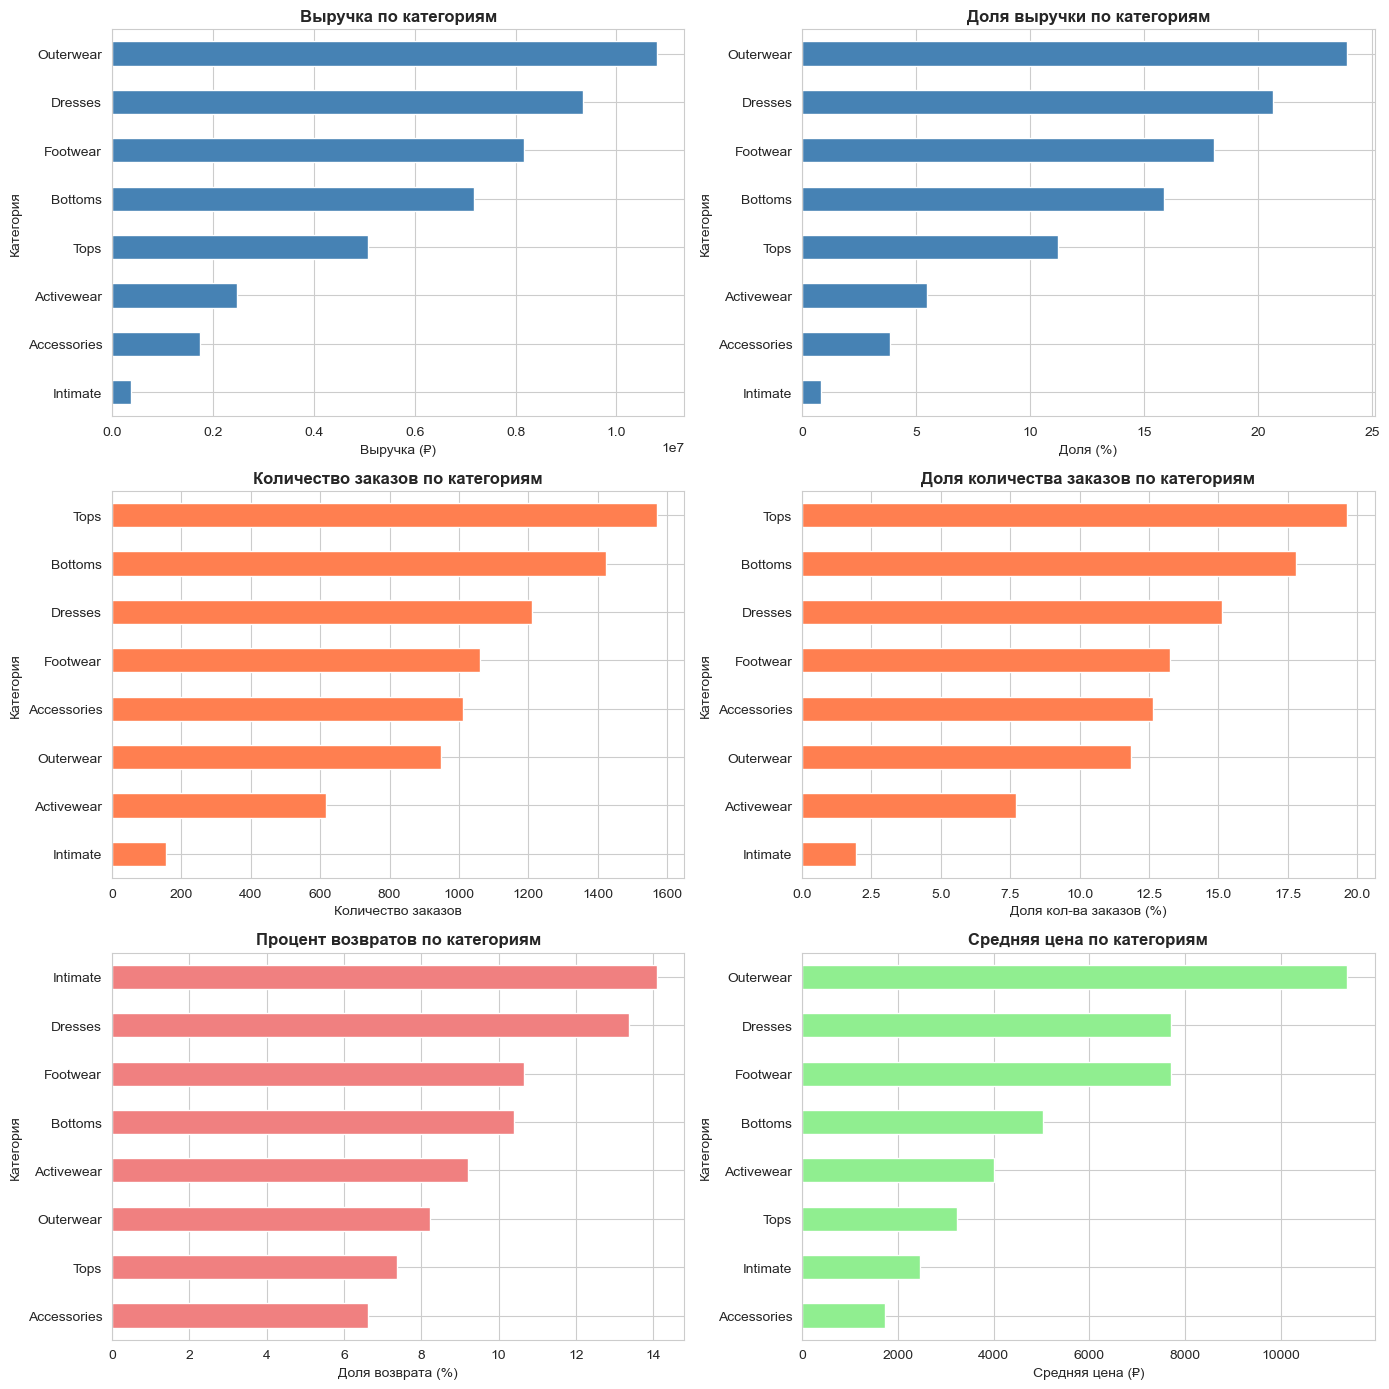

In [11]:
# Анализ категорий
category_analysis = df.groupby('category').agg({
    'order_id': 'count',
    'order_amount': ['sum', 'mean'],
    'returned': 'sum',
    'quantity': 'sum'
}).round(2)

category_analysis.columns = ['Orders', 'Revenue', 'Avg_Price', 'Returns', 'Units_Sold']
category_analysis['Return_Rate_%'] = (category_analysis['Returns'] / category_analysis['Orders'] * 100).round(2)
category_analysis['Revenue_Pct'] = (category_analysis['Revenue'] / category_analysis['Revenue'].sum() * 100).round(2)
category_analysis['Orders_Pct'] = (category_analysis['Orders'] / category_analysis['Orders'].sum() * 100).round(2)
category_analysis = category_analysis.sort_values('Revenue', ascending=False)

print("Анализ по категориям:")
display(category_analysis)

# Визуализация
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# 1. Выручка по категориям
ax = axes[0, 0]
category_analysis['Revenue'].sort_values().plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Выручка по категориям', fontweight='bold')
ax.set_xlabel('Выручка (₽)')
ax.set_ylabel('Категория')

# 2. Доля выручки по категориям
ax = axes[0, 1]
category_analysis['Revenue_Pct'].sort_values().plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Доля выручки по категориям', fontweight='bold')
ax.set_xlabel('Доля (%)')
ax.set_ylabel('Категория')

# 3. Количество заказов
ax = axes[1, 0]
category_analysis['Orders'].sort_values().plot(kind='barh', ax=ax, color='coral')
ax.set_title('Количество заказов по категориям', fontweight='bold')
ax.set_xlabel('Количество заказов')
ax.set_ylabel('Категория')

# 4. Доля кол-ва заказов по котегориям
ax = axes[1, 1]
category_analysis['Orders_Pct'].sort_values().plot(kind='barh', ax=ax, color='coral')
ax.set_title('Доля количества заказов по категориям', fontweight='bold')
ax.set_xlabel('Доля кол-ва заказов (%)')
ax.set_ylabel('Категория')

# 5. Return rate
ax = axes[2, 0]
category_analysis['Return_Rate_%'].sort_values().plot(kind='barh', ax=ax, color='lightcoral')
ax.set_title('Процент возвратов по категориям', fontweight='bold')
ax.set_xlabel('Доля возврата (%)')
ax.set_ylabel('Категория')

# 6. Средняя цена
ax = axes[2, 1]
category_analysis['Avg_Price'].sort_values().plot(kind='barh', ax=ax, color='lightgreen')
ax.set_title('Средняя цена по категориям', fontweight='bold')
ax.set_xlabel('Средняя цена (₽)')
ax.set_ylabel('Категория')

plt.tight_layout()
plt.show()

В тройке лидиров по выручке и среднему чеку:
- верхняя одежда
- платья
- обувь

В тройке лидиров по кол-ву проданных товаров:
- топы
- брюки
- платья

В тройке анти-лидиров по возврату:
- нижнее белье
- платья
- обувь

#### Визуализация трендов продаж по месяцам

C:\Users\DrGremlin\AppData\Local\Temp\ipykernel_8696\2109307843.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(monthly_sales['month'].astype(str), rotation=45)
C:\Users\DrGremlin\AppData\Local\Temp\ipykernel_8696\2109307843.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(monthly_sales['month'].astype(str), rotation=45)


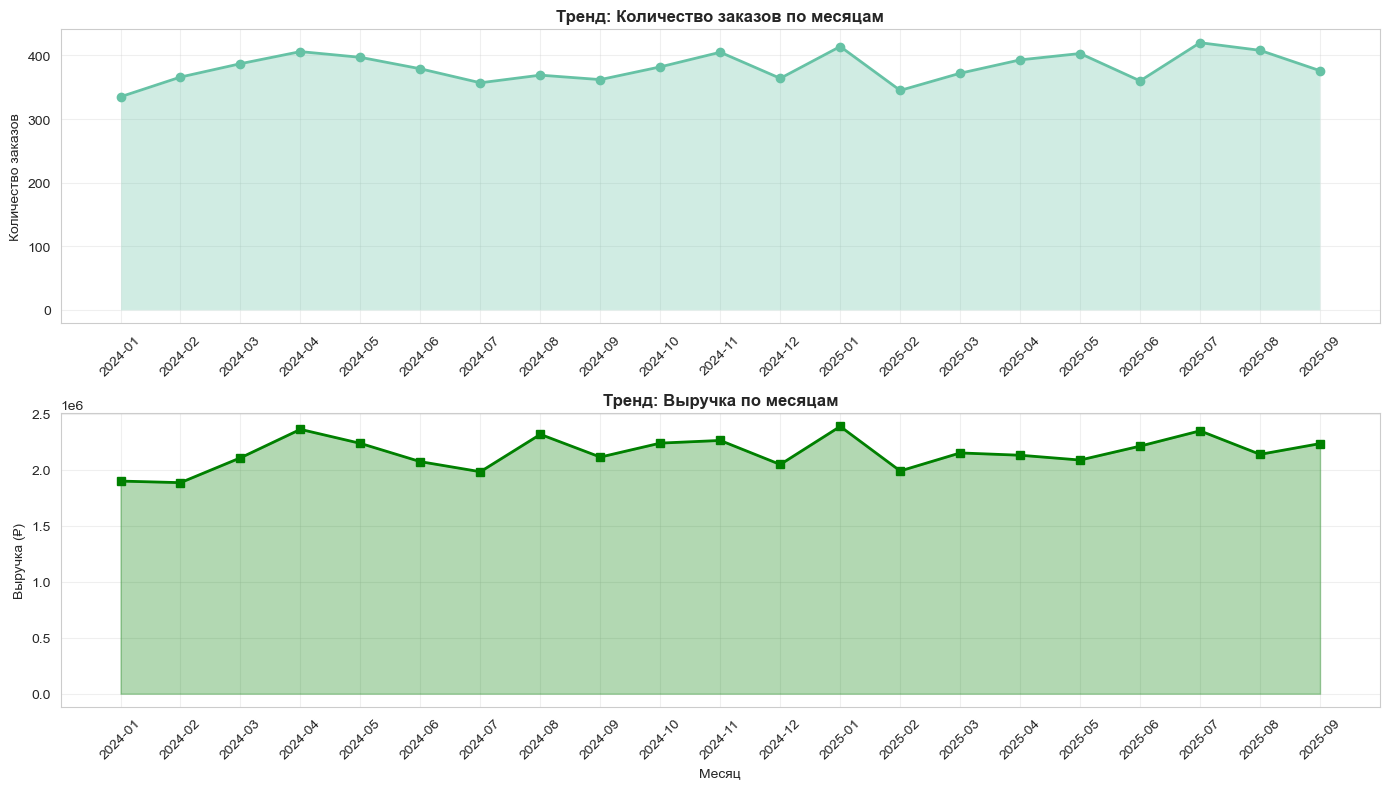


Средние месячные показатели:
  • Среднее кол-во заказов в месяц: 381
  • Среднея выручка в месяц: ₽2,151,022


In [12]:
# Месячные продажи
monthly_sales = df.groupby('year_month').agg({
    'order_id': 'count',
    'order_amount': 'sum'
}).reset_index()
monthly_sales.columns = ['month', 'orders', 'revenue']

# Визуализация
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# График 1: Количество заказов
ax = axes[0]
ax.plot(monthly_sales['month'].astype(str), monthly_sales['orders'], marker='o', linewidth=2, markersize=6)
ax.fill_between(range(len(monthly_sales)), monthly_sales['orders'], alpha=0.3)
ax.set_title('Тренд: Количество заказов по месяцам', fontweight='bold', fontsize=12)
ax.set_ylabel('Количество заказов')
ax.grid(True, alpha=0.3)
ax.set_xticklabels(monthly_sales['month'].astype(str), rotation=45)

# График 2: Выручка
ax = axes[1]
ax.plot(monthly_sales['month'].astype(str), monthly_sales['revenue'], marker='s', linewidth=2, color='green', markersize=6)
ax.fill_between(range(len(monthly_sales)), monthly_sales['revenue'], alpha=0.3, color='green')
ax.set_title('Тренд: Выручка по месяцам', fontweight='bold', fontsize=12)
ax.set_ylabel('Выручка (₽)')
ax.set_xlabel('Месяц')
ax.grid(True, alpha=0.3)
ax.set_xticklabels(monthly_sales['month'].astype(str), rotation=45)

plt.tight_layout()
plt.show()

print(f"\nСредние месячные показатели:")
print(f"  • Среднее кол-во заказов в месяц: {monthly_sales['orders'].mean():.0f}")
print(f"  • Среднея выручка в месяц: ₽{monthly_sales['revenue'].mean():,.0f}")

- Видны тренды по месяцам
- Пики активности в 2024: апрель, ноябрь; в 2025: январь, май, июль.
- Указывает на сезонность в одежде

#### Анализ клиентской базы

Анализ клиентов:


,customer_id,orders,total_spent,first_order,last_order,days_active
415,4008,140,942957.45,2024-01-05,2025-09-09,613
449,4042,140,867892.53,2024-01-01,2025-09-22,630
417,4010,140,862398.83,2024-01-29,2025-09-23,603
440,4033,140,855304.78,2024-01-07,2025-09-28,630
411,4004,137,839857.28,2024-01-07,2025-09-18,620
...,...,...,...,...,...,...
158,1159,1,1101.31,2025-05-29,2025-05-29,0
87,1088,1,733.01,2024-10-22,2024-10-22,0
148,1149,1,627.15,2025-09-16,2025-09-16,0
40,1041,1,511.94,2025-05-06,2025-05-06,0


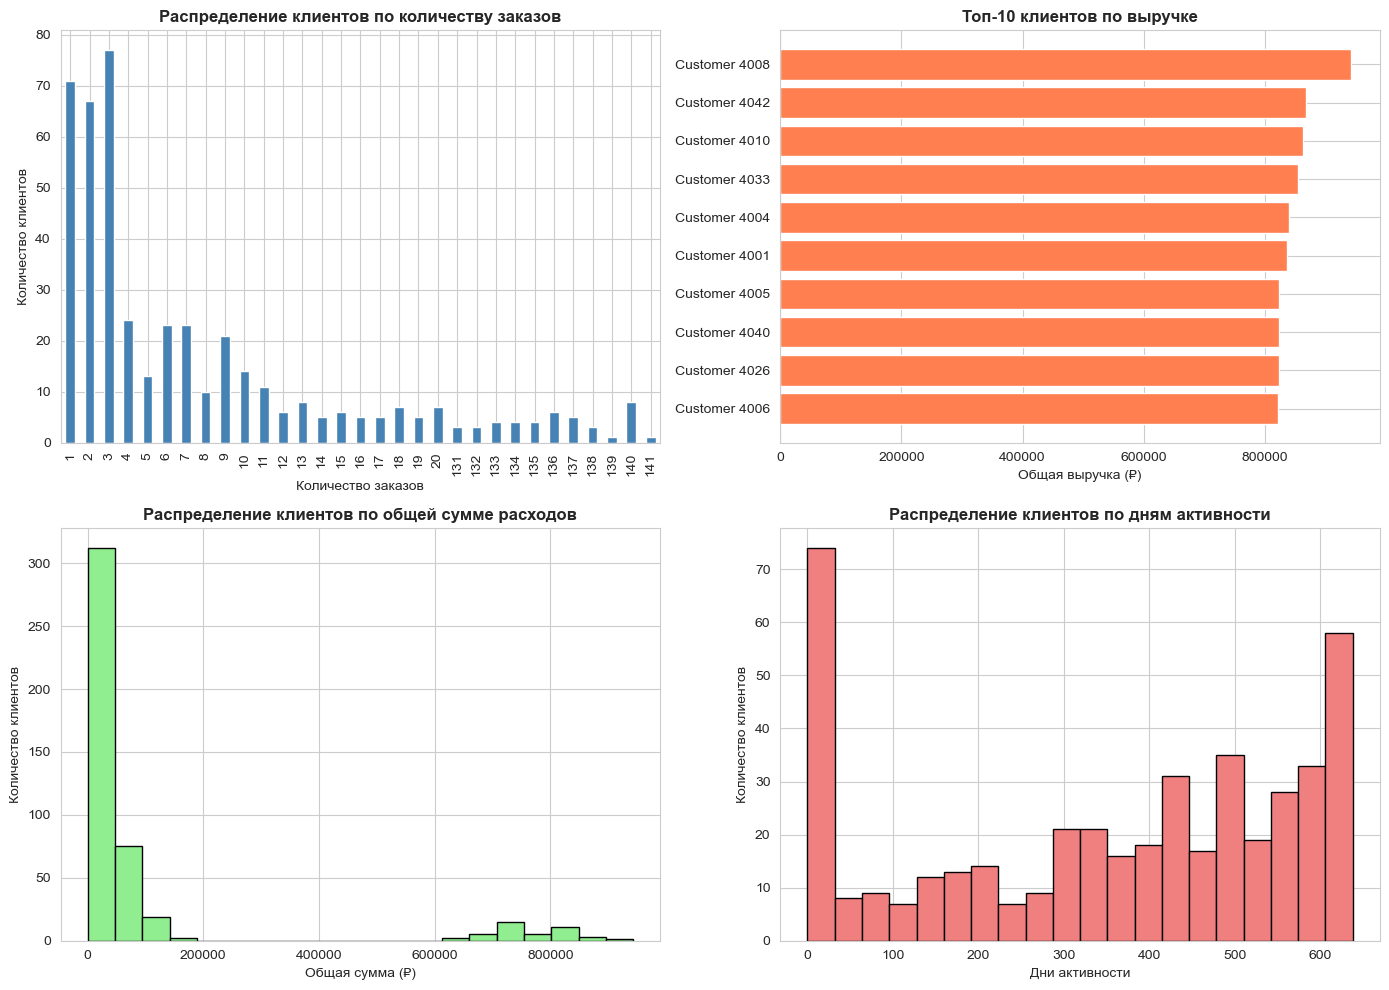

In [13]:
# Анализ клиентов
customer_stats = df.groupby('customer_id').agg({
    'order_id': 'count',
    'order_amount': 'sum',
    'order_date': ['min', 'max']
}).reset_index()

customer_stats.columns = ['customer_id', 'orders', 'total_spent', 'first_order', 'last_order']
customer_stats['days_active'] = (customer_stats['last_order'] - customer_stats['first_order']).dt.days
customer_stats = customer_stats.sort_values('total_spent', ascending=False)

print("Анализ клиентов:")
display(customer_stats)

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Распределение по количеству заказов
ax = axes[0, 0]
customer_stats['orders'].value_counts().sort_index().plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Распределение клиентов по количеству заказов', fontweight='bold')
ax.set_xlabel('Количество заказов')
ax.set_ylabel('Количество клиентов')

# 2. Топ-10 клиентов по выручке
ax = axes[0, 1]
top_customers = customer_stats.nlargest(10, 'total_spent').sort_values(by='total_spent')
ax.barh(range(len(top_customers)), top_customers['total_spent'], color='coral')
ax.set_yticks(range(len(top_customers)))
ax.set_yticklabels(['Customer ' + str(x) for x in top_customers['customer_id']])
ax.set_title('Топ-10 клиентов по выручке', fontweight='bold')
ax.set_xlabel('Общая выручка (₽)')

# 3. Распределение по общей сумме
ax = axes[1, 0]
customer_stats['total_spent'].hist(bins=20, ax=ax, color='lightgreen', edgecolor='black')
ax.set_title('Распределение клиентов по общей сумме расходов', fontweight='bold')
ax.set_xlabel('Общая сумма (₽)')
ax.set_ylabel('Количество клиентов')

# 4. Дни активности
ax = axes[1, 1]
customer_stats['days_active'].hist(bins=20, ax=ax, color='lightcoral', edgecolor='black')
ax.set_title('Распределение клиентов по дням активности', fontweight='bold')
ax.set_xlabel('Дни активности')
ax.set_ylabel('Количество клиентов')

plt.tight_layout()
plt.show()

In [14]:
# статистика колонки заказов
customer_stats['orders'].describe()

count    450.000000
mean      17.777778
std       38.278076
min        1.000000
25%        2.000000
50%        4.000000
75%       10.000000
max      141.000000
Name: orders, dtype: float64

- Максимум распределения кол-ва покупателей приходится на 3 покупки.
- Есть клиенты, сделавшие больше 100 покупок.
- Топ-10 покупателей принесли более 800т.р. выручки каждый.
- Основная масса покупателей потратили до 50т.р.
- Не смотря на то, что пик кол-ва пользователей по дням активности приходится на первые 20 дней, наблюдается постепенный рост кол-ва пользователей по дням активности, что говорит о хорошем удержании клиентов.
- 50% всех покупателей сделали не больше 4 покупок каждый.
- Максимальное кол-во покупок на 1 покупателя - 141.

#### Анализ маркетплейсов

Анализ по маркетплейсам:


,Orders,Revenue,Avg_Price,Returns,Customers,Return_Rate_%,Orders_Pct_%
marketplace,,,,,,,
Wildberries,2823,15989379.58,5663.97,285,337,10.10,35.29
Ozon,1938,10960766.98,5655.71,177,307,9.13,24.22
Yandex.Market,1672,9263627.09,5540.45,150,284,8.97,20.90
Lamoda,1191,6736695.21,5656.34,117,255,9.82,14.89
ASOS,376,2220998.34,5906.91,34,139,9.04,4.70


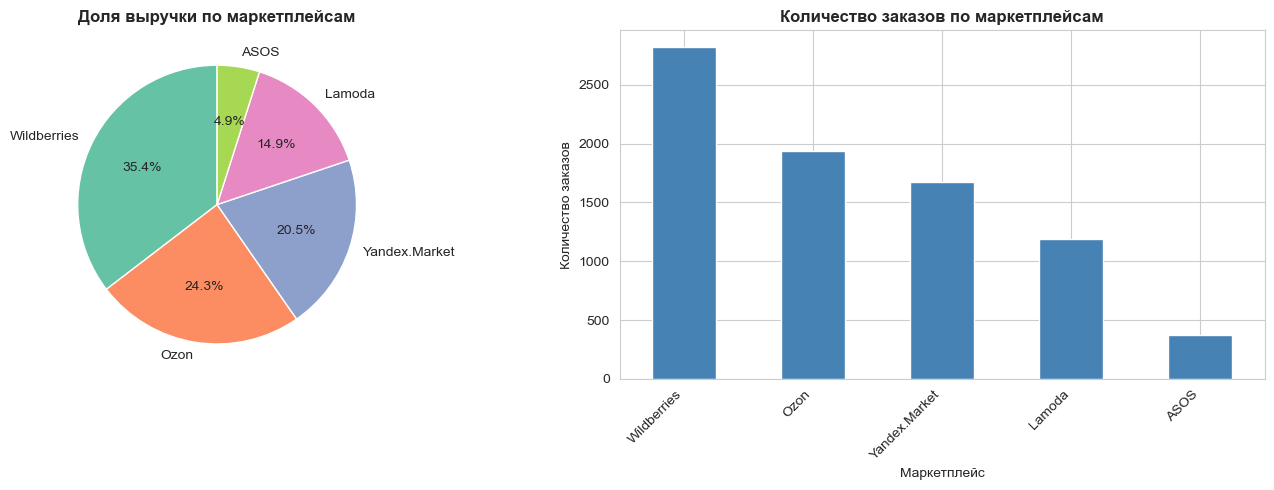

In [15]:
# Анализ по маркетплейсам
marketplace_analysis = df.groupby('marketplace').agg({
    'order_id': 'count',
    'order_amount': ['sum', 'mean'],
    'returned': 'sum',
    'customer_id': 'nunique'
}).round(2)

marketplace_analysis.columns = ['Orders', 'Revenue', 'Avg_Price', 'Returns', 'Customers']
marketplace_analysis['Return_Rate_%'] = (marketplace_analysis['Returns'] / marketplace_analysis['Orders'] * 100).round(2)
marketplace_analysis['Orders_Pct_%'] = (marketplace_analysis['Orders'] / marketplace_analysis['Orders'].sum() * 100).round(2)
marketplace_analysis = marketplace_analysis.sort_values('Revenue', ascending=False)

print("Анализ по маркетплейсам:")
display(marketplace_analysis)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie: Доля выручки
ax = axes[0]
colors = sns.color_palette("Set2", len(marketplace_analysis))
ax.pie(marketplace_analysis['Revenue'], labels=marketplace_analysis.index, autopct='%1.1f%%',
       colors=colors, startangle=90)
ax.set_title('Доля выручки по маркетплейсам', fontweight='bold')

# Bar: Количество заказов
ax = axes[1]
marketplace_analysis['Orders'].plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Количество заказов по маркетплейсам', fontweight='bold')
ax.set_ylabel('Количество заказов')
ax.set_xlabel('Маркетплейс')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Wildberries - лидер как по выручке, так и по кол-ву заказов.

#### Анализ возвратов по категориям

АНАЛИЗ ВОЗВРАТОВ

Общая статистика:
  • Всего возвратов: 763
  • Процент возвратов: 9.54%
  • Сумма по возвращенным товарам: ₽4,605,676.15

Возвраты по категориям:


,Returns,Total_Orders,Return_Rate_%
category,,,
Intimate,22,156,14.10
Dresses,162,1211,13.38
Footwear,113,1060,10.66
Bottoms,148,1423,10.40
Activewear,57,618,9.22
Outerwear,78,949,8.22
Tops,116,1571,7.38
Accessories,67,1012,6.62


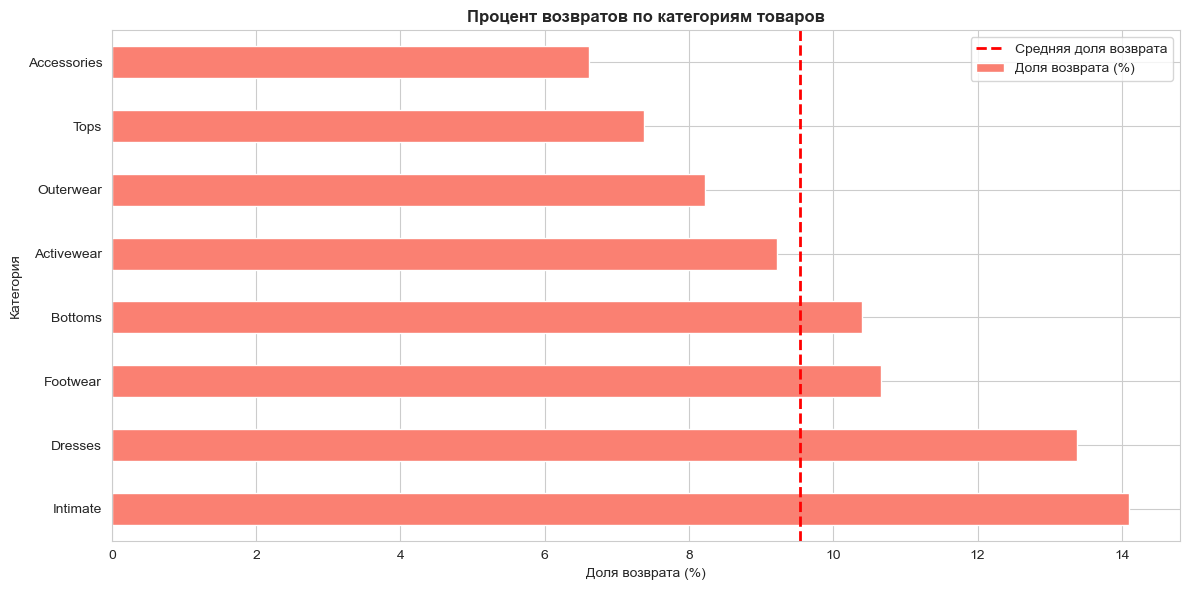

In [16]:
# Анализ возвратов
print("="*80)
print("АНАЛИЗ ВОЗВРАТОВ")
print("="*80)

print(f"\nОбщая статистика:")
print(f"  • Всего возвратов: {df['returned'].sum()}")
print(f"  • Процент возвратов: {df['returned'].mean()*100:.2f}%")
print(f"  • Сумма по возвращенным товарам: ₽{df[df['returned']==1]['order_amount'].sum():,.2f}")

print(f"\nВозвраты по категориям:")
returns_by_category = df.groupby('category').agg({
    'returned': ['sum', 'count']
}).round(2)
returns_by_category.columns = ['Returns', 'Total_Orders']
returns_by_category['Return_Rate_%'] = (returns_by_category['Returns'] / returns_by_category['Total_Orders'] * 100).round(2)
returns_by_category = returns_by_category.sort_values('Return_Rate_%', ascending=False)
display(returns_by_category)

# Визуализация
fig, ax = plt.subplots(figsize=(12, 6))
returns_by_category['Return_Rate_%'].plot(kind='barh', ax=ax, color='salmon', label='Доля возврата (%)')
ax.axvline(x=df['returned'].mean()*100, color='red', linestyle='--', linewidth=2, label='Средняя доля возврата')
ax.set_title('Процент возвратов по категориям товаров', fontweight='bold')
ax.set_xlabel('Доля возврата (%)')
ax.set_ylabel('Категория')
ax.legend()
plt.tight_layout()
plt.show()

- Средний процент возвратов - 9.54%.
- Разброс по категориям от 6,52% до 14,1%
- Intimate - самая проблемная категория (14,1%)

## Выводы EDA.

✓ ДАННЫЕ КАЧЕСТВЕННЫЕ И ГОТОВЫ К АНАЛИЗУ

📊 Ключевые выводы:

1. РАСПРЕДЕЛЕНИЕ ДАННЫХ:
    - Данные охватывают 21 месяц (январь 2024 - сентябрь 2025)
    - 8,000 заказов от 450 уникальных клиентов
    - 50% клиентов (медиана) совершают не более 4 заказов (низкая активность)<br><br>

3. ТОВАРНЫЕ КАТЕГОРИИ:
    - 8 основных категорий.
    - Верхнаяя одежда - лидер по выручке (24.6%) благодаря самому высокому среднему чеку, при этом по кол-ву продаж верхняя одежда на 6 месте из 8.
    - Нижнее белье самое низкое по выручке и кол-ву продаж, но самое высокое (антилидер) по кол-ву возвратов.<br><br>

4. МАРКЕТПЛЕЙСЫ:
    - Wildberries - доминирующий (35.4% по выручке, 35.29% по кол-ву заказов)<br><br>

5. ВОЗВРАТЫ:
    - Средний процент возвратов - 9.54%.
    - Разброс по категориям от 6,52% до 14,1%
    - Нижнее белье - самая проблемная категория (14,1%)<br><br>

6. СЕЗОННОСТЬ:
    - Видны тренды по месяцам
    - Пики активности в 2024: апрель, ноябрь; в 2025: январь, май, июль.
    - Указывает на сезонность в одежде